In [5]:
from bw_temporalis import easy_timedelta_distribution, easy_datetime_distribution, TemporalisLCA, Timeline, TemporalDistribution
from bw_temporalis.lcia import characterize_methane, characterize_co2
import bw2data as bd
import bw2calc as bc
import bw_graph_tools as graph
import numpy as np
import pandas as pd

In [6]:
bd.projects.set_current("Temporalis example project")

In [7]:
bd.Database('AGWP_CO2').write({
    ('AGWP_CO2AGWP_multi_CO2', "CO2"): {
        "type": "emission",
        "name": "carbon dioxide",
        "temporalis code": "co2",
    },
    ('AGWP_CO2', 'CF'): {
        'exchanges': [
            {
                'amount': 1,
                'input': ('AGWP_CO2', 'CO2'),
                'type': 'biosphere'
            },
        ],
        'name': 'CF',
        'type': 'process'
    }
})


07:19:33 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


07:19:33 [info     ] Vacuuming database            


In [8]:
bd.Method(("GWP", "CF_CO2")).write([
    (('AGWP_CO2', "CO2"), 1)
])

In [9]:
lca = bc.LCA({('AGWP_CO2', 'CF'): 1}, ("GWP", "CF_CO2"))   #FU can be more than 1 thing !
lca.lci()
lca.lcia()

In [10]:
lca = TemporalisLCA(lca)

Starting graph traversal
Calculation count: 0


In [11]:
tl = lca.build_timeline()

In [12]:
tl.build_dataframe()
#shows inventory results

,date,amount,flow,activity
0,2024-11-15 06:19:40,1.0,3,4


In [13]:
bd.get_node(id=3)

'carbon dioxide' (None, None, None)

<Axes: xlabel='date', ylabel='amount'>

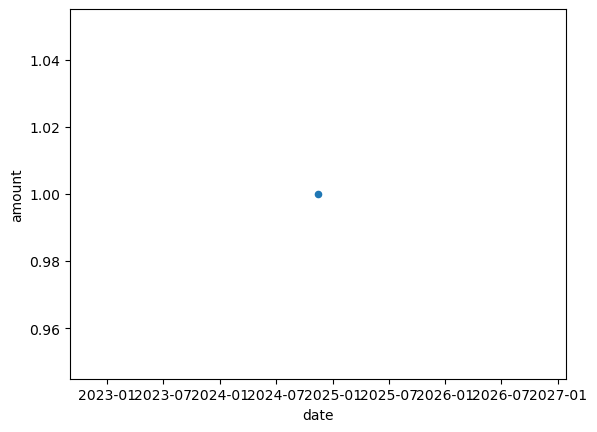

In [14]:
tl.df.plot(x="date", y="amount", kind="scatter")
#dynamic LCI

In [16]:
#Characterisation
characterized_df_co2 = tl.characterize_dataframe(
    characterization_function=characterize_co2, 
    flow={3},   #{bd.get_node(name="carbon dioxide").id}
)

<Axes: xlabel='date', ylabel='amount'>

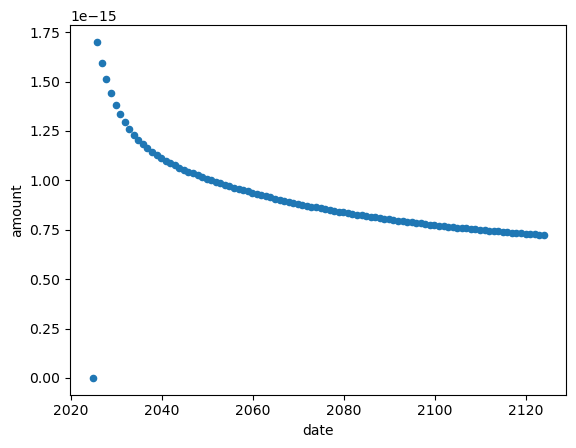

In [17]:
characterized_df_co2.plot(x="date", y="amount", kind="scatter")

<Axes: xlabel='date', ylabel='amount_sum'>

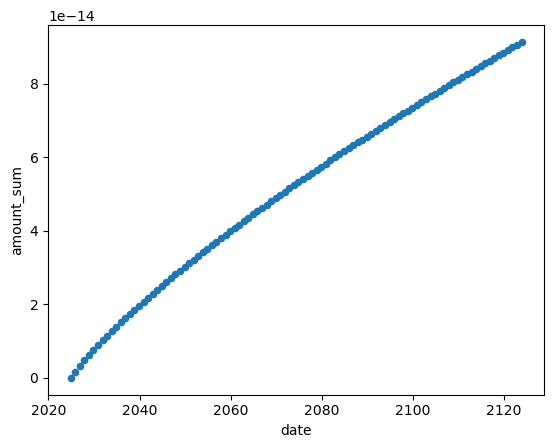

In [18]:
characterized_df_co2.plot(x="date", y="amount_sum", kind="scatter")

In [19]:
characterized_df_co2.amount_sum

0     0.000000e+00
1     1.700401e-15
2     3.296605e-15
3     4.807624e-15
4     6.248592e-15
          ...     
95    8.852125e-14
96    8.924957e-14
97    8.997613e-14
98    9.070095e-14
99    9.142406e-14
Name: amount_sum, Length: 100, dtype: float64

In [22]:
print('AGWP_99 =', characterized_df_co2.amount_sum[99], 'W.yr/m²')

AGWP_99 = 9.14240583521201e-14 W.yr/m²
